In [ ]:
import pandas as pd #data frame operations
import numpy as np #arrays and math functions
from pandas.plotting import scatter_matrix  # scatter plot matrix
from scipy.stats import uniform  # for training-and-test split
import tensorflow as tf
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
from sklearn.tree import DecisionTreeRegressor  # machine learning tree
from sklearn.ensemble import RandomForestRegressor # ensemble method
import matplotlib.pyplot as plt # Visualizations
from matplotlib.ticker import FuncFormatter # Formatting Visualizations
import seaborn as sns # Visualizations
import statsmodels.api as sm # Statistical Modeling
from google.colab import drive #access google drive
import os
#Mount drive
drive.mount('/content/drive/')



Mounted at /content/drive/


In [ ]:
spotifydf = pd.read_csv('/content/drive/MyDrive/spotify_data.csv')

In [ ]:
spotifydf = spotifydf.drop('Unnamed: 0', axis=1) #drop column
spotifydf.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [ ]:
spotifydf.describe() #descriptive analytics

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06
mean,1.838312e+01,2.011955e+03,5.374382e-01,6.396699e-01,5.287778e+00,-8.981353e+00,6.346533e-01,9.281477e-02,3.215370e-01,2.523489e-01,2.230189e-01,4.555636e-01,1.213771e+02,2.495618e+05,3.885879e+00
std,1.588554e+01,6.803901e+00,1.844780e-01,2.705009e-01,3.555197e+00,5.682215e+00,4.815275e-01,1.268409e-01,3.549872e-01,3.650731e-01,2.010707e-01,2.685190e-01,2.977975e+01,1.494262e+05,4.676967e-01
min,0.000000e+00,2.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.073000e+03,0.000000e+00
25%,5.000000e+00,2.006000e+03,4.130000e-01,4.540000e-01,2.000000e+00,-1.082900e+01,0.000000e+00,3.710000e-02,6.400000e-03,1.050000e-06,9.790000e-02,2.260000e-01,9.879700e+01,1.810910e+05,4.000000e+00
50%,1.500000e+01,2.012000e+03,5.500000e-01,6.940000e-01,5.000000e+00,-7.450000e+00,1.000000e+00,5.070000e-02,1.470000e-01,1.760000e-03,1.340000e-01,4.380000e-01,1.219310e+02,2.257440e+05,4.000000e+00
75%,2.900000e+01,2.018000e+03,6.770000e-01,8.730000e-01,8.000000e+00,-5.276000e+00,1.000000e+00,8.900000e-02,6.400000e-01,6.140000e-01,2.920000e-01,6.740000e-01,1.399030e+02,2.869135e+05,4.000000e+00
max,1.000000e+02,2.023000e+03,9.930000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.710000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.499930e+02,6.000495e+06,5.000000e+00


In [ ]:
spotifydf.isna()
spotifydf = spotifydf.fillna(0) #replace null values with 0

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>],
       [<Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'time_signature'}>, <Axes: >]],
      dtype=object)

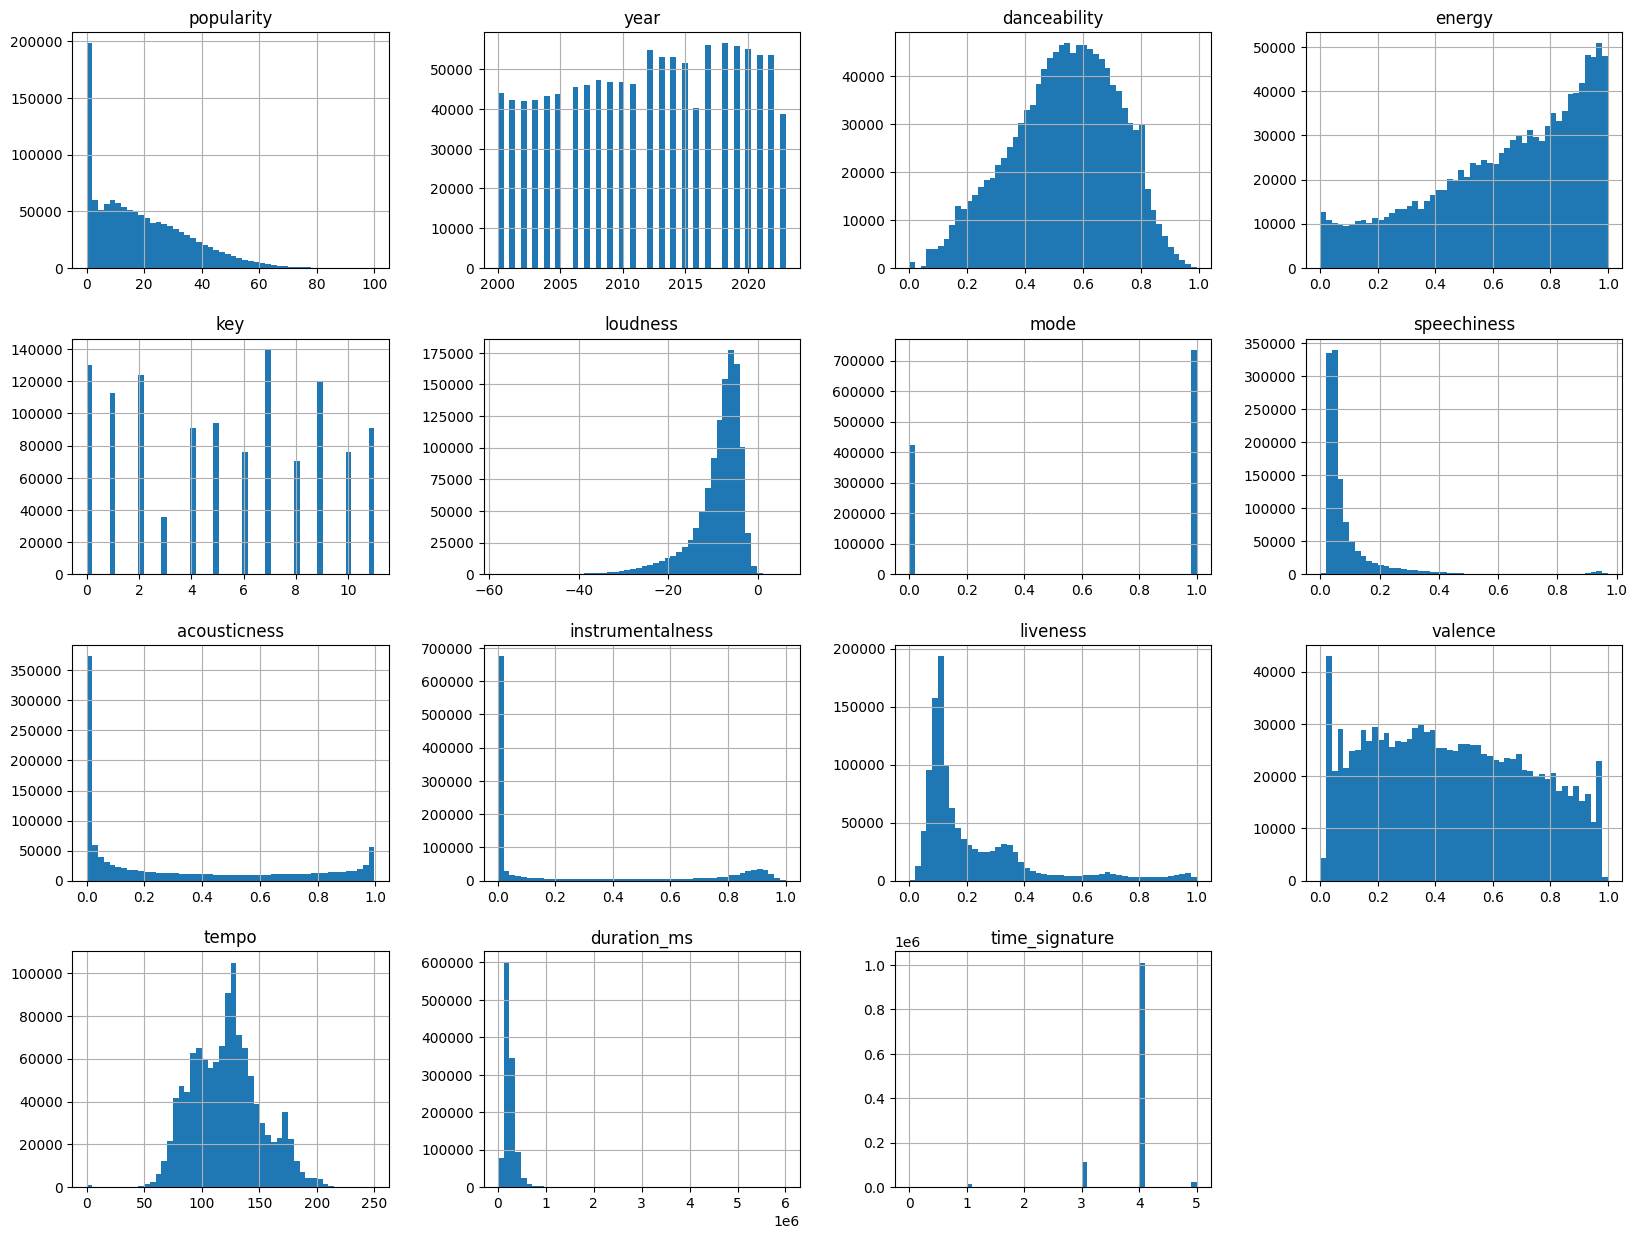

In [ ]:
spotifydf.hist(bins=50, figsize=(20,15)) #hist plot of distribution of columns


In [ ]:
spotifydf.dtypes #dataframe structure

artist_name          object
track_name           object
track_id             object
popularity            int64
year                  int64
genre                object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
dtype: object

In [ ]:
pd.set_option('display.max_rows', 500) #display all row counts
spotifydf.genre.value_counts() #total counts of each genre

black-metal          21852
gospel               21621
ambient              21389
acoustic             21097
alt-rock             20918
emo                  20845
indian               20583
k-pop                20004
new-age              19911
blues                19682
forro                19379
comedy               19334
spanish              19158
chill                18906
dancehall            18788
dub                  18785
samba                18599
french               18519
classical            18259
death-metal          18038
deep-house           17896
country              17883
sleep                17851
sertanejo            17566
salsa                17501
goth                 17381
guitar               17266
dance                17212
power-pop            17161
garage               17123
disco                16987
pop-film             16907
german               16417
folk                 16170
hardcore             15993
jazz                 15943
rock-n-roll          15891
c

In [ ]:
pd.set_option('display.max_rows', 10)

In [ ]:
# Tim Addition
# To limit the amount of data we are working with, going to focus on genres
# Step 1 - get unique genre types
unique_genres_count = spotifydf['genre'].nunique()
print(f'There are {unique_genres_count} unique genres in the dataset')

unique_genres_names = spotifydf['genre'].unique()
print(f'Unique Genres: \n{unique_genres_names}')

There are 82 unique genres in the dataset
Unique Genres: 
['acoustic' 'afrobeat' 'alt-rock' 'ambient' 'black-metal' 'blues'
 'breakbeat' 'cantopop' 'chicago-house' 'chill' 'classical' 'club'
 'comedy' 'country' 'dance' 'dancehall' 'death-metal' 'deep-house'
 'detroit-techno' 'disco' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'guitar' 'hard-rock' 'hardcore'
 'hardstyle' 'heavy-metal' 'hip-hop' 'house' 'indian' 'indie-pop'
 'industrial' 'jazz' 'k-pop' 'metal' 'metalcore' 'minimal-techno'
 'new-age' 'opera' 'party' 'piano' 'pop' 'pop-film' 'power-pop'
 'progressive-house' 'psych-rock' 'punk' 'punk-rock' 'rock' 'rock-n-roll'
 'romance' 'sad' 'salsa' 'samba' 'sertanejo' 'show-tunes'
 'singer-songwriter' 'ska' 'sleep' 'songwriter' 'soul' 'spanish' 'swedish'
 'tango' 'techno' 'trance' 'trip-hop']


In [ ]:
# Determine which genre is the most occuring in the dataset
genre_counts = spotifydf['genre'].value_counts()
print(genre_counts)

black-metal       21852
gospel            21621
ambient           21389
acoustic          21097
alt-rock          20918
                  ...  
chicago-house      5170
dubstep            4774
detroit-techno     3920
rock               3319
songwriter          589
Name: genre, Length: 82, dtype: int64


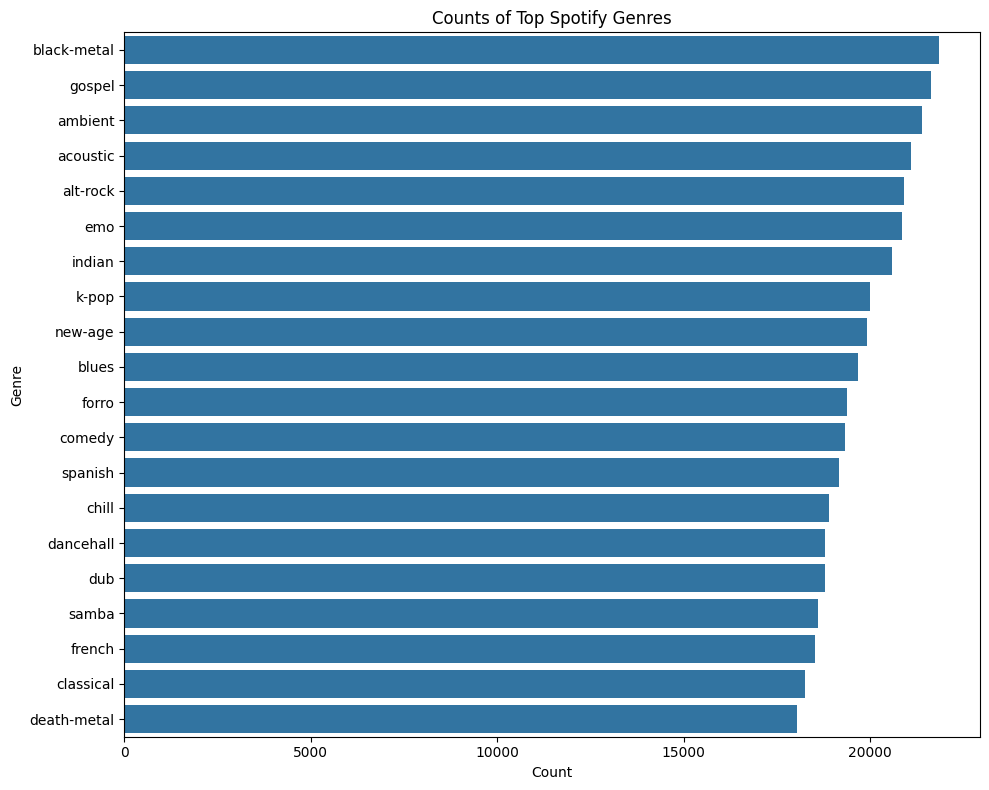

In [ ]:
# Visualize Genre Count
genre_counts_df = genre_counts.reset_index()
genre_counts_df.columns = ['Genre', 'Count']

# To reduce overcrowding in the visual, Select the top N genres
top_20_genres = genre_counts_df.nlargest(20, 'Count') # first param == amount we want displayed

plt.figure(figsize=(10, 8)) # You can adjust the size as needed

# Create the bar plot
sns.barplot(x='Count', y='Genre', data=top_20_genres)

# Option 3: Rotate labels (if the plot is vertical)
# plt.xticks(rotation=90) # Uncomment if using a vertical bar plot

plt.title('Counts of Top Spotify Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

In [ ]:
# Selecting alt-rock to focus analysis on
alt_rock_spotify_data = spotifydf[spotifydf['genre']== 'alt-rock']
alt_rock_spotify_data

# reduced down to ~21K observations, 19 columns

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1770,Neon Trees,Everybody Talks,2iUmqdfGZcHIhS3b9E9EWq,77,2012,alt-rock,0.471,0.924,8,-3.906,1,0.0586,0.003010,0.000000,0.3130,0.7250,154.961,177280,4
1771,Deftones,Rosemary,4FEr6dIdH6EqLKR0jB560J,71,2012,alt-rock,0.285,0.613,5,-6.412,1,0.0421,0.018500,0.100000,0.1140,0.0772,126.628,413347,4
1772,Black Veil Brides,In The End,1RTYixE1DD3g3upEpmCJpa,68,2012,alt-rock,0.442,0.939,8,-4.180,1,0.0941,0.000183,0.005890,0.0857,0.2700,140.021,228280,4
1773,Thousand Foot Krutch,Courtesy Call,0AOmbw8AwDnwXhHC3OhdVB,71,2012,alt-rock,0.531,0.638,11,-5.145,0,0.0809,0.004090,0.000000,0.0822,0.4450,164.079,236898,4
1774,Deftones,Entombed,4bLCPfBLKlqiONo6TALTh5,65,2012,alt-rock,0.399,0.753,10,-3.882,1,0.0375,0.005930,0.128000,0.3660,0.1670,130.055,299240,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115497,Psychostick,Hate Times 8,5LeEQUgDPX00zuit45yUwf,27,2011,alt-rock,0.674,0.930,1,-4.507,1,0.1740,0.057100,0.000006,0.2940,0.8380,89.314,212333,4
1115498,Switchfoot,Thrive,42X58dLQKMGKG3p7DsITWn,27,2011,alt-rock,0.707,0.580,7,-8.185,1,0.0265,0.003220,0.022200,0.1200,0.0724,113.985,312213,4
1115499,Soil,The One,17zcvGKe8RWEC5rVd7SKIc,30,2011,alt-rock,0.445,0.912,10,-5.314,1,0.0744,0.000546,0.000586,0.4360,0.7920,162.989,169253,4
1115500,Destroyer,Poor in Love,7LJn9rmki2eFKad2aRAJV0,25,2011,alt-rock,0.591,0.457,4,-10.352,1,0.0325,0.138000,0.025800,0.1910,0.1880,114.964,206267,4


In [ ]:
# Unique Artists
count_unique_alt_artists = alt_rock_spotify_data['artist_name'].nunique()
print(f'There are {count_unique_alt_artists} unique Alt-Rock artists')

unique_alt_artist_values = alt_rock_spotify_data['artist_name'].unique()
unique_alt_artist_values

There are 1527 unique Alt-Rock artists


array(['Neon Trees', 'Deftones', 'Black Veil Brides', ..., 'andymori',
       'Paul Kelly', 'Tanya Donelly'], dtype=object)

In [ ]:
# Correlation Matrix to see bi-variable relationships
correlation_matrix = alt_rock_spotify_data.corr()
print(correlation_matrix)

                popularity      year  danceability    energy       key  \
popularity        1.000000  0.204146      0.125058  0.016493  0.012615   
year              0.204146  1.000000      0.108214 -0.053231 -0.002903   
danceability      0.125058  0.108214      1.000000 -0.089423  0.001773   
energy            0.016493 -0.053231     -0.089423  1.000000  0.011057   
key               0.012615 -0.002903      0.001773  0.011057  1.000000   
...                    ...       ...           ...       ...       ...   
liveness         -0.028802 -0.029748     -0.101936  0.129412  0.007856   
valence           0.063154 -0.004035      0.467566  0.244826  0.019533   
tempo            -0.018935 -0.031544     -0.248754  0.179593 -0.001602   
duration_ms      -0.043061 -0.071812     -0.153985 -0.147633  0.013880   
time_signature    0.037961  0.013904      0.145040  0.130224  0.002894   

                loudness      mode  speechiness  acousticness  \
popularity      0.080407 -0.064416    -0.01136

<ipython-input-15-c865122fb82d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = alt_rock_spotify_data.corr()


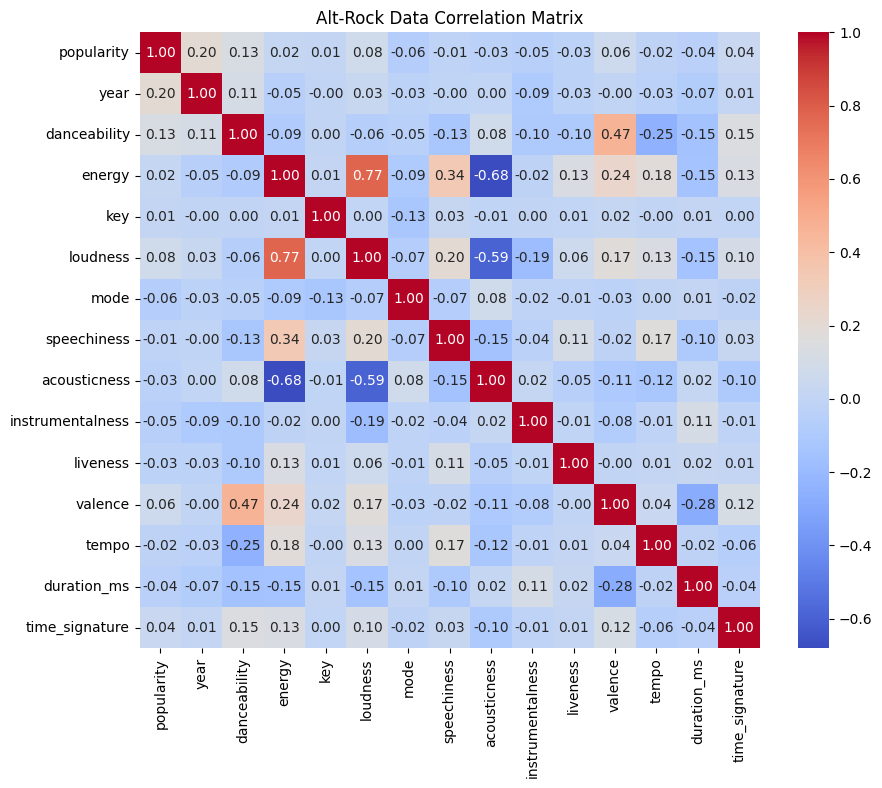

In [ ]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))  #  set the figure size
plt.title('Alt-Rock Data Correlation Matrix')
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [ ]:
"""
Correlation Matrix Alt Rock Observations
1. Popularity Vs Year - Slightly positive correlation between the two attributes and is the largest value in the
matrix when evaluating "Popularity" attribute. This suggest as "Modern" age songs may be appealing to the current user
base of spotify.

2. Valence vs Danceability - There is a strong postive correlation between the two attributes. That as the Valence of
a song increases, the song's danceability increases.

3. Speechiness vs Energy - There seems to be a slightly positive correlation between these two. This may shed light on
as songs tend to have more spoken lyrics, it has a higher energy rating. This COULD mean that the user-base values
meaningful lyrics or lyrics that resonate to the user/align with the genre.

4. Acousticness vs Energy vs Loudness - Strong negative correlation; makes sense as acoustic songs are more mellow and tend to not
be as upbeat. Same goes with loudness.

Thoughts - I think subsettting by genres introduces unintential biases/conditions that makes predictions models skewed form the start
; I think the group needs to filter by year or something else to have a better view of the data
"""

'\nCorrelation Matrix Alt Rock Observations\n1. Popularity Vs Year - Slightly positive correlation between the two attributes and is the largest value in the\nmatrix when evaluating "Popularity" attribute. This suggest as "Modern" age songs may be appealing to the current user\nbase of spotify.\n\n2. Valence vs Danceability - There is a strong postive correlation between the two attributes. That as the Valence of\na song increases, the song\'s danceability increases.\n\n3. Speechiness vs Energy - There seems to be a slightly positive correlation between these two. This may shed light on\nas songs tend to have more spoken lyrics, it has a higher energy rating. This COULD mean that the user-base values\nmeaningful lyrics or lyrics that resonate to the user/align with the genre.\n\n4. Acousticness vs Energy vs Loudness - Strong negative correlation; makes sense as acoustic songs are more mellow and tend to not\nbe as upbeat. Same goes with loudness.\n\nThoughts - I think subsettting by ge

In [ ]:
# subset by year range >= X Year
##spotify_updated = spotifydf[spotifydf['year'] >= 2017]
#spotify_updated

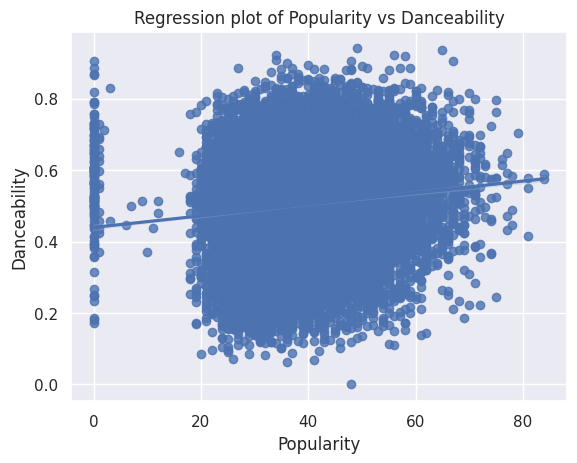

In [ ]:
sns.set(color_codes=True) #regression plot popularity and dancebility
sns.regplot(x='popularity', y='danceability', data=alt_rock_spotify_data)
plt.title('Regression plot of Popularity vs Danceability')
plt.xlabel('Popularity')
plt.ylabel('Danceability')
plt.grid(True)
plt.show()

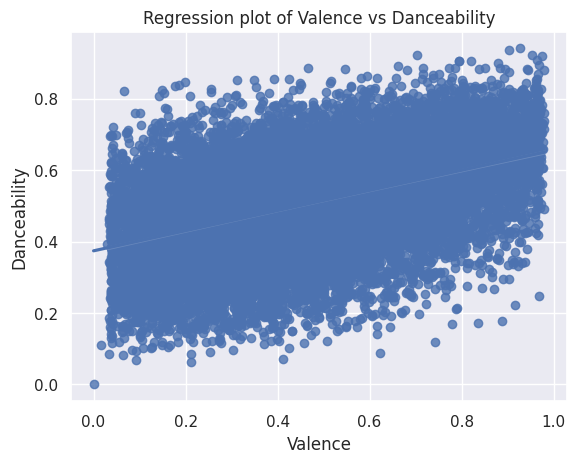

In [ ]:
sns.set(color_codes=True) #regression plot valence and danceability
sns.regplot(x='valence', y='danceability', data=alt_rock_spotify_data)
plt.title('Regression plot of Valence vs Danceability')
plt.xlabel('Valence')
plt.ylabel('Danceability')
plt.grid(True)
plt.show()

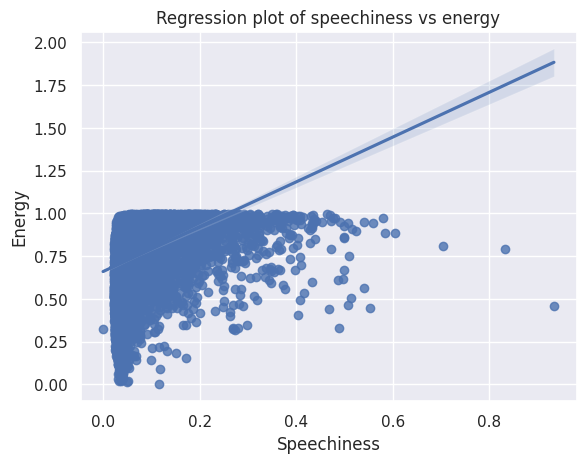

In [ ]:
sns.set(color_codes=True) ##regression plot speechiness and energy
sns.regplot(x='speechiness', y='energy', data=alt_rock_spotify_data)
plt.title('Regression plot of speechiness vs energy')
plt.xlabel('Speechiness')
plt.ylabel('Energy')
plt.grid(True)
plt.show()

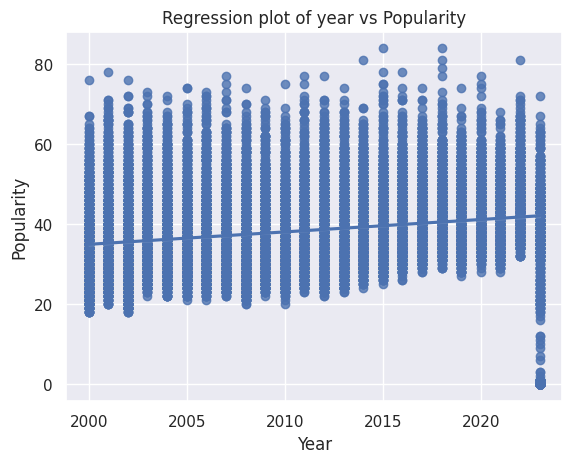

In [ ]:
sns.set(color_codes=True) #regression plot popularity and year
sns.regplot(x='year', y='popularity', data=alt_rock_spotify_data)
plt.title('Regression plot of year vs Popularity')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

In [ ]:
# employ training-and-test regimen for model validation
np.random.seed(4444)
alt_rock_spotify_data['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(alt_rock_spotify_data))
rock_train = alt_rock_spotify_data[alt_rock_spotify_data['runiform'] >= 0.33]
rock_test = alt_rock_spotify_data[alt_rock_spotify_data['runiform'] < 0.33]
# check training data frame
print('\n alt rock train data frame (rows, columns): ',\
    rock_train.shape)
print(rock_train.head())
# check test data frame
print('\n alt rock test data frame (rows, columns): ',\
    rock_test.shape)
print(rock_test.head())


 alt rock train data frame (rows, columns):  (14018, 20)
               artist_name       track_name                track_id  \
1770            Neon Trees  Everybody Talks  2iUmqdfGZcHIhS3b9E9EWq   
1772     Black Veil Brides       In The End  1RTYixE1DD3g3upEpmCJpa   
1773  Thousand Foot Krutch    Courtesy Call  0AOmbw8AwDnwXhHC3OhdVB   
1774              Deftones         Entombed  4bLCPfBLKlqiONo6TALTh5   
1775           Passion Pit      Take a Walk  4Sfa7hdVkqlM8UW5LsSY3F   

      popularity  year     genre  danceability  energy  key  loudness  mode  \
1770          77  2012  alt-rock         0.471   0.924    8    -3.906     1   
1772          68  2012  alt-rock         0.442   0.939    8    -4.180     1   
1773          71  2012  alt-rock         0.531   0.638   11    -5.145     0   
1774          65  2012  alt-rock         0.399   0.753   10    -3.882     1   
1775          65  2012  alt-rock         0.566   0.755   11    -5.526     1   

      speechiness  acousticness  instrum

<ipython-input-23-c6bd3631c9a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alt_rock_spotify_data['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(alt_rock_spotify_data))


In [ ]:
model = str('popularity ~ danceability + year + valence + speechiness')

In [ ]:
# fit the model to the training set
train_model_fit = smf.ols(model, data = rock_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
rock_train['predict_pop'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
rock_test['predict_pop'] = train_model_fit.predict(rock_test)

'''ANALYSIS: this model is highly inaccurate, need to find another that attains a higher r-squared to predict popularity'''

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     192.7
Date:                Tue, 19 Mar 2024   Prob (F-statistic):          3.89e-161
Time:                        18:36:05   Log-Likelihood:                -52326.
No. Observations:               14018   AIC:                         1.047e+05
Df Residuals:                   14013   BIC:                         1.047e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -548.5671     25.433    -21.569   

<ipython-input-25-0d47d4b7fed6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rock_train['predict_pop'] = train_model_fit.fittedvalues
<ipython-input-25-0d47d4b7fed6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rock_test['predict_pop'] = train_model_fit.predict(rock_test)


'ANALYSIS: this model is highly inaccurate, need to find another that attains a higher r-squared to predict popularity'

In [ ]:
#Prediction model using naive bayes
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

X_train = rock_train.drop(columns=['popularity']) #Target variable for prediction
y_train = rock_train['popularity']
X_test = rock_test.drop(columns=['popularity'])
y_test = rock_test['popularity']

X_train.drop(columns=['artist_name','track_name','track_id','genre'], inplace=True)
X_test.drop(columns=['artist_name','track_name','track_id','genre'], inplace=True)


#Model creation
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print('The model accuracy is:', accuracy)

'''Naive Bayes accuracy is highly inaccurate'''

The model accuracy is: 0.052608695652173916


'Naive Bayes accuracy is highly inaccurate'

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier() #training model using decision tree classifier
tree_model.fit(X_train, y_train)

Y_pred_tree = tree_model.predict(X_test)

tree_acc = metrics.accuracy_score(y_test, Y_pred_tree)
print('Accuracy:',tree_acc)

'''Model accuracy is still low for decision tree classifier'''

Accuracy: 0.033478260869565214


'Model accuracy is still low for decision tree classifier'

<ipython-input-28-89e1aa8b8d04>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_20_genres['above_threshold'] = df_top_20_genres['popularity'] > 75


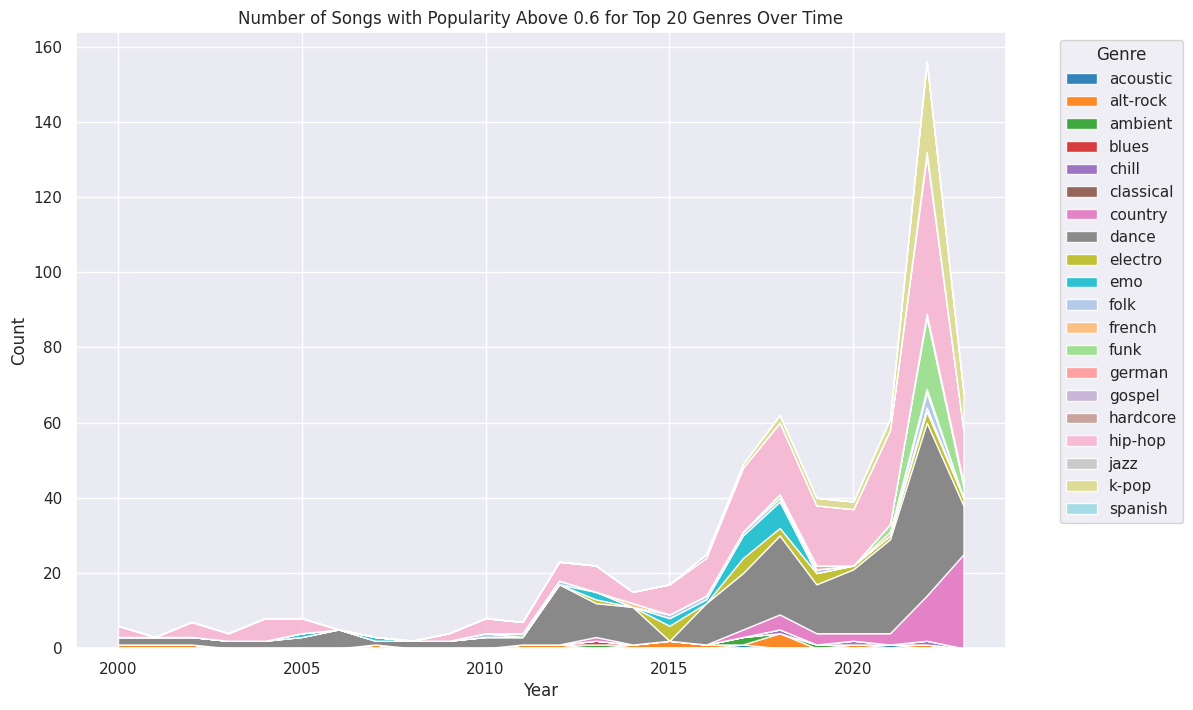

In [ ]:
#spotifydf['year'] = pd.to_datetime(spotifydf['year'], format='%Y')

genre_popularity = spotifydf.groupby('genre')['popularity'].sum().sort_values(ascending=False)

top_20_genres = genre_popularity.head(20).index

df_top_20_genres = spotifydf[spotifydf['genre'].isin(top_20_genres)]

#sets threshold of .6 popularity to be counter[]
df_top_20_genres['above_threshold'] = df_top_20_genres['popularity'] > 75

custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                 '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                 '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5',
                 '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5']

#pivot table for the top 20 genres and how popular they are over time
pivot_table_top_20 = df_top_20_genres.pivot_table(values='above_threshold', index='year', columns='genre', aggfunc='sum', fill_value=0)

#stacked area plot
plt.figure(figsize=(12, 8))
sns.set_palette("husl")
plt.stackplot(pivot_table_top_20.index,
              [pivot_table_top_20[genre] for genre in pivot_table_top_20.columns],
              labels=pivot_table_top_20.columns,
              alpha=0.9,
              colors= custom_colors)

plt.title('Number of Songs with Popularity Above 0.6 for Top 20 Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [ ]:
# subset by year range >= X Year
spotify_updated = spotifydf[spotifydf['year'] >= 2017]
spotify_updated

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
253072,Chord Overstreet,Hold On,5vjLSffimiIP26QG5WcN2K,79,2017,acoustic,0.618,0.443,2,-9.681,1,0.0526,0.46900,0.000000,0.0829,0.167,119.949,198853,4
253073,Iron & Wine,Call It Dreaming,1MxHIIzcTeFnaNsDGY3pfj,63,2017,acoustic,0.512,0.501,5,-9.971,1,0.0325,0.60900,0.000063,0.0973,0.726,79.989,231755,4
253074,Kina Grannis,Iris,5oV8bZaShr2d01FFMHBUPq,60,2017,acoustic,0.497,0.130,6,-15.571,1,0.0436,0.84100,0.000000,0.1110,0.179,130.769,181136,3
253075,Andrew Belle,When the End Comes,3Et4LKZLnXygPYfNdeB3D3,52,2017,acoustic,0.541,0.575,9,-9.463,1,0.0491,0.67700,0.215000,0.1020,0.428,91.980,354400,4
253076,NEEDTOBREATHE,WALKING ON WATER,0WWUC8RjWvuBTkiiFDxyQf,48,2017,acoustic,0.534,0.784,0,-6.542,1,0.0476,0.12500,0.000009,0.0753,0.251,118.011,246933,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622646,Lemongrass,Grapes - Remix,3H5dcp3GdIejynK7vCcPxX,0,2023,trip-hop,0.660,0.598,0,-7.629,1,0.0359,0.12300,0.276000,0.1040,0.370,90.017,386739,4
622647,Groove Armada,Rescue Me - Roland Leesker's You Got To Dance ...,3ZZ7FgBdEv5Eq537nTvdYH,1,2023,trip-hop,0.769,0.604,9,-13.930,1,0.0634,0.00582,0.246000,0.1140,0.330,122.999,423418,4
622648,Brazilian Girls,Good Time - Radio Edit,2BRpsndU96kgMjlfKjyY8q,0,2023,trip-hop,0.803,0.847,10,-5.808,0,0.0765,0.08750,0.097600,0.2890,0.573,129.987,180413,4
622649,Brazilian Girls,Good Time,4da5NJr6Pm72tdEzzbK5Us,1,2023,trip-hop,0.794,0.839,10,-6.373,0,0.0526,0.04980,0.106000,0.1370,0.767,129.980,228600,4


array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>],
       [<Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'time_signature'}>, <Axes: >]],
      dtype=object)

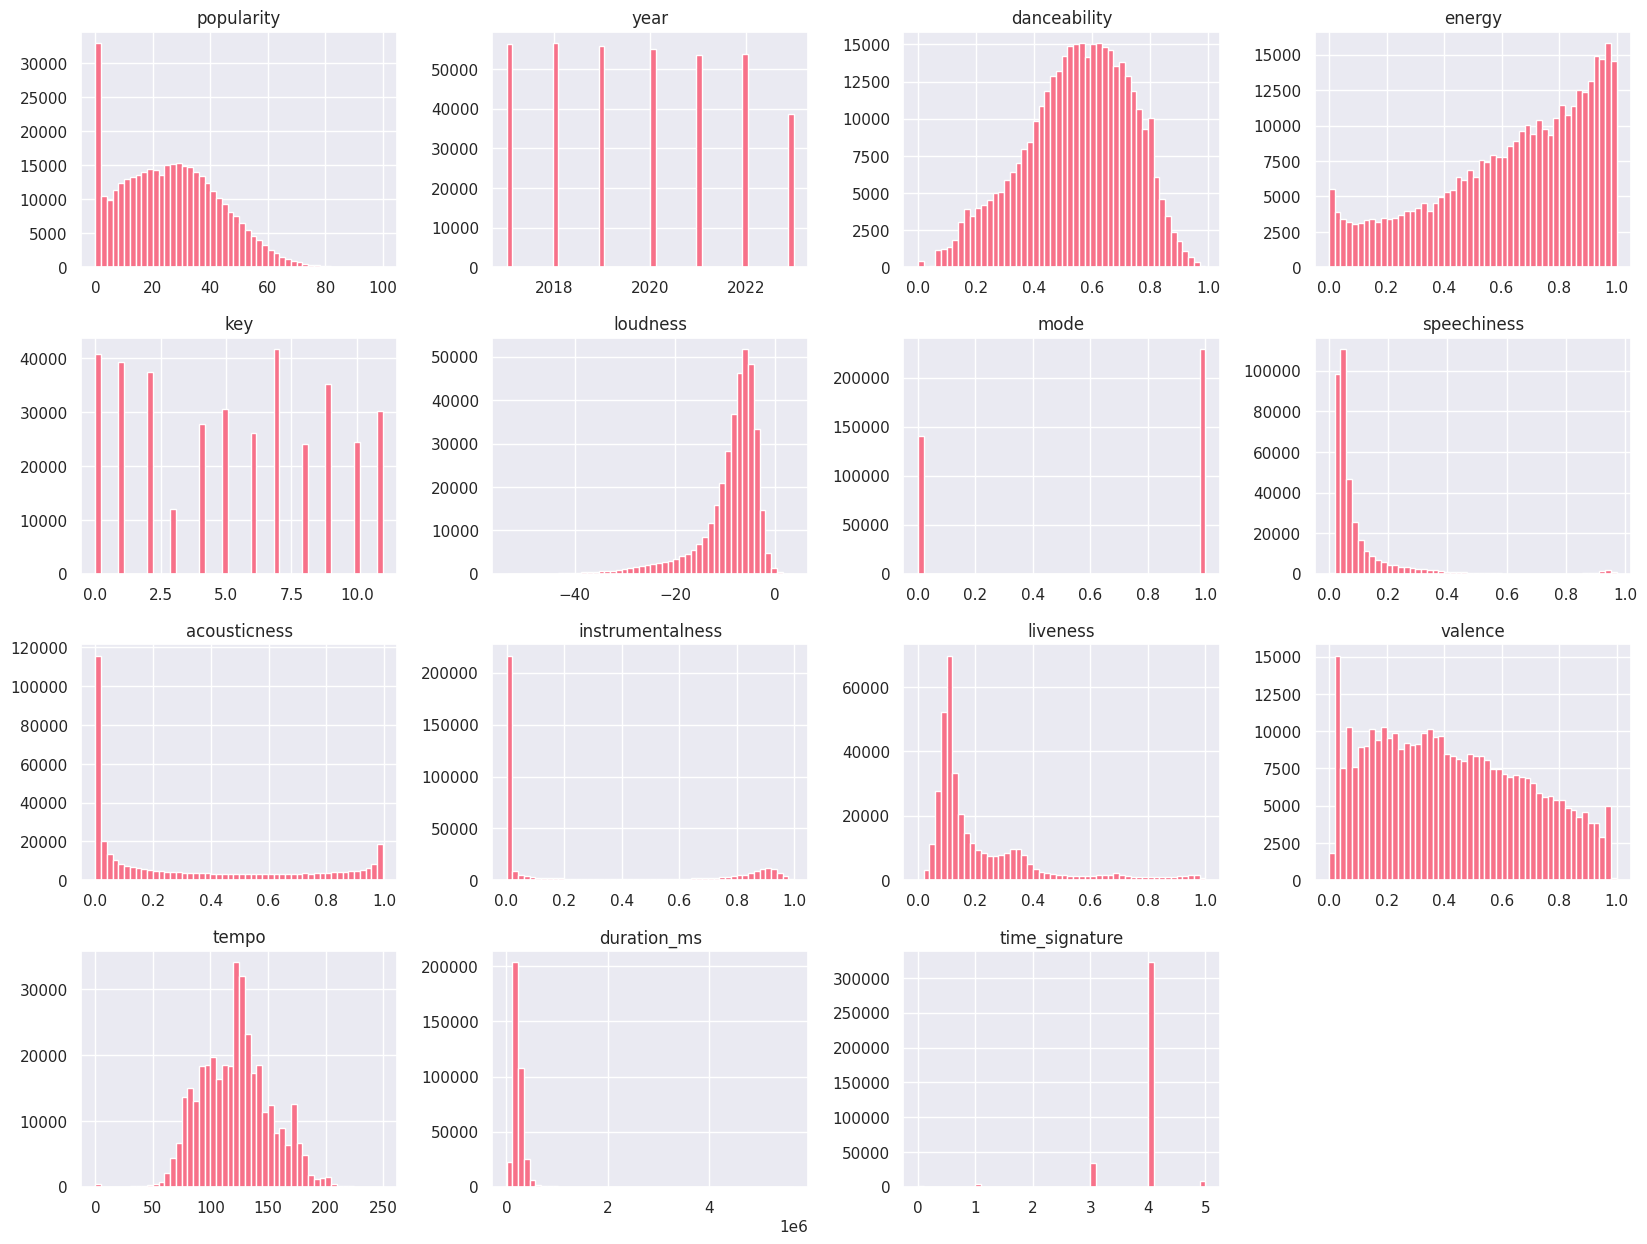

In [ ]:
# Visualize histograms of spotify_updated attributes
spotify_updated.hist(bins=50, figsize=(20,15))

In [ ]:
# Correlation Matrix for spotify_updated

spotify_updated_numeric = spotify_updated.select_dtypes(include=[np.number])

correlation_matrix_updated = spotify_updated_numeric.corr()
print(correlation_matrix_updated)

                popularity      year  danceability    energy       key  \
popularity        1.000000  0.053588      0.164485 -0.031140  0.004099   
year              0.053588  1.000000     -0.003980 -0.018716  0.001626   
danceability      0.164485 -0.003980      1.000000  0.158863  0.030826   
energy           -0.031140 -0.018716      0.158863  1.000000  0.043731   
key               0.004099  0.001626      0.030826  0.043731  1.000000   
...                    ...       ...           ...       ...       ...   
liveness         -0.097073 -0.011556     -0.126784  0.200779 -0.001814   
valence           0.008833 -0.004404      0.497514  0.233748  0.032507   
tempo             0.003564  0.006579      0.002529  0.280857  0.013218   
duration_ms      -0.136053 -0.052468     -0.058135  0.060439  0.003980   
time_signature    0.030732  0.004789      0.189207  0.169103  0.010521   

                loudness      mode  speechiness  acousticness  \
popularity      0.075690 -0.024014    -0.05142

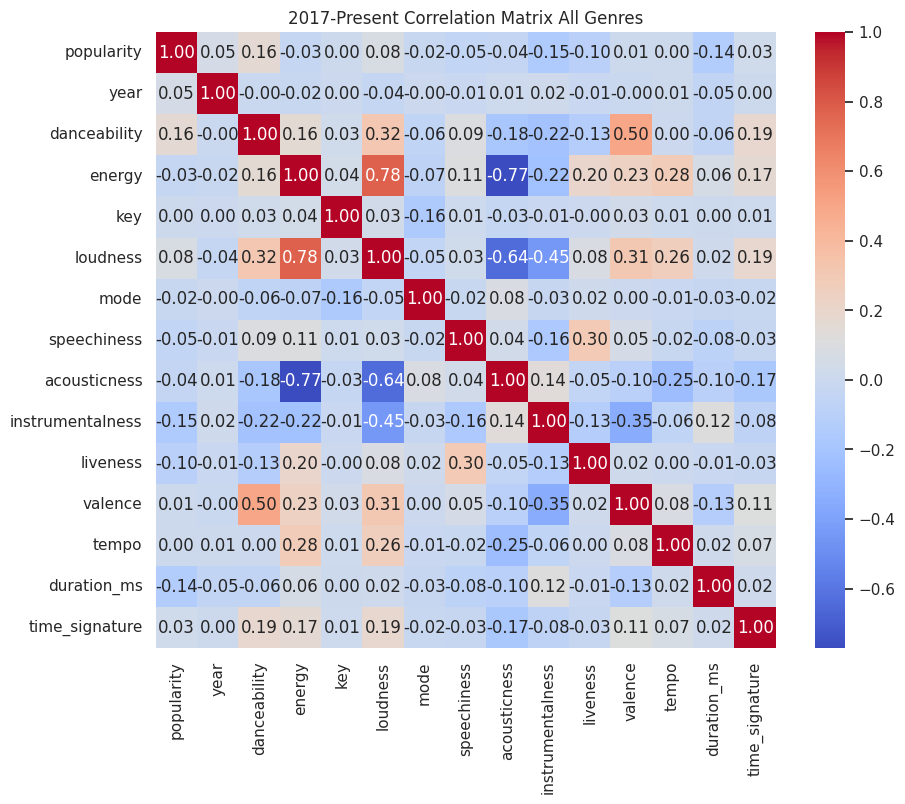

In [ ]:
# Heatmap for Correlation_matrix_updated
plt.figure(figsize=(10, 8))  #  set the figure size
plt.title('2017-Present Correlation Matrix All Genres')
sns.heatmap(correlation_matrix_updated, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [ ]:
# Model
# employ training-and-test regimen for model validation
np.random.seed(4444)
spotify_updated['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(spotify_updated))
updated_2017ToPresent_train = spotify_updated[spotify_updated['runiform'] >= 0.33]
updated_2017ToPresent_test = spotify_updated[spotify_updated['runiform'] < 0.33]
# check training data frame
print('\n 2017-2023 train data frame (rows, columns): ',\
    updated_2017ToPresent_train.shape)
print(updated_2017ToPresent_train.head())
# check test data frame
print('\n 2017-2023 test data frame (rows, columns): ',\
    updated_2017ToPresent_test.shape)
print(updated_2017ToPresent_test.head())



 2017-2023 train data frame (rows, columns):  (247612, 20)
             artist_name                       track_name  \
253072  Chord Overstreet                          Hold On   
253074      Kina Grannis                             Iris   
253075      Andrew Belle               When the End Comes   
253076     NEEDTOBREATHE                 WALKING ON WATER   
253077     NEEDTOBREATHE  HARD LOVE (feat. Lauren Daigle)   

                      track_id  popularity  year     genre  danceability  \
253072  5vjLSffimiIP26QG5WcN2K          79  2017  acoustic         0.618   
253074  5oV8bZaShr2d01FFMHBUPq          60  2017  acoustic         0.497   
253075  3Et4LKZLnXygPYfNdeB3D3          52  2017  acoustic         0.541   
253076  0WWUC8RjWvuBTkiiFDxyQf          48  2017  acoustic         0.534   
253077  4ahfLYf0VLVVvN3sdOyQN2          49  2017  acoustic         0.449   

        energy  key  loudness  mode  speechiness  acousticness  \
253072   0.443    2    -9.681     1       0.0526  

<ipython-input-33-0f7ee7d9305e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_updated['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(spotify_updated))


In [ ]:
# Model Continued
model = str('popularity ~ danceability + loudness + instrumentalness + liveness + duration_ms + energy + acousticness')

In [ ]:
# fit the model to the training set
train_model_fit = smf.ols(model, data = updated_2017ToPresent_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
updated_2017ToPresent_train['predict_pop'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
updated_2017ToPresent_test['predict_pop'] = train_model_fit.predict(updated_2017ToPresent_test)


                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     3004.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:36:12   Log-Likelihood:            -1.0439e+06
No. Observations:              247612   AIC:                         2.088e+06
Df Residuals:                  247604   BIC:                         2.088e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           40.5407      0.287  

<ipython-input-35-1d16837c4404>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_2017ToPresent_train['predict_pop'] = train_model_fit.fittedvalues
<ipython-input-35-1d16837c4404>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_2017ToPresent_test['predict_pop'] = train_model_fit.predict(updated_2017ToPresent_test)


In [ ]:
'''
R-Squared - 7.8% of variance in popularity rating is attributed to the dependent variables; this is really low and
alludes to there are other aspects that contribute to popularity ratings

F-Statistic - 3004 suggests that the independent variables chosen have a signficant effect on popularity
'''

'\nR-Squared - 7.8% of variance in popularity rating is attributed to the dependent variables; this is really low and\nalludes to there are other aspects that contribute to popularity ratings\n\nF-Statistic - 3004 suggests that the independent variables chosen have a signficant effect on popularity\n'

In [ ]:
# Model Continued - 2nd attempt to reduce independent variables to see what happens
model2 = str('popularity ~ danceability + loudness + instrumentalness ')

In [ ]:
# fit the model2 to the training set
train_model_fit = smf.ols(model2, data = updated_2017ToPresent_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
updated_2017ToPresent_train['predict_pop'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
updated_2017ToPresent_test['predict_pop'] = train_model_fit.predict(updated_2017ToPresent_test)

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     3597.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:36:12   Log-Likelihood:            -1.0487e+06
No. Observations:              247612   AIC:                         2.097e+06
Df Residuals:                  247608   BIC:                         2.098e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           18.9532      0.137  

<ipython-input-38-0d545e67d073>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_2017ToPresent_train['predict_pop'] = train_model_fit.fittedvalues
<ipython-input-38-0d545e67d073>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_2017ToPresent_test['predict_pop'] = train_model_fit.predict(updated_2017ToPresent_test)


In [ ]:
'''
Interpretation of model 2
lower r-squared value
still stasticially significant
Model1 accounts for more change in popularity rating compared to model2

So What- the simpler model offers ease of interpretation and use, but sacrifices some of the explanatory ability
and fit of the more complex model

'''

'\nInterpretation of model 2\nlower r-squared value\nstill stasticially significant\nModel1 accounts for more change in popularity rating compared to model2\n\nSo What- the simpler model offers ease of interpretation and use, but sacrifices some of the explanatory ability\nand fit of the more complex model\n\n'

In [ ]:
#Prediction model using naive bayes
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

X_train = updated_2017ToPresent_train.drop(columns=['popularity']) #Target variable for prediction
y_train = updated_2017ToPresent_train['popularity']
X_test = updated_2017ToPresent_test.drop(columns=['popularity'])
y_test = updated_2017ToPresent_test['popularity']

X_train.drop(columns=['artist_name','track_name','track_id','genre'], inplace=True)
X_test.drop(columns=['artist_name','track_name','track_id','genre'], inplace=True)


#Model creation
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print('The model accuracy is:', accuracy)

'''Naive Bayes accuracy is about the same as model1 OLS regression'''

The model accuracy is: 0.07199488386202825


'Naive Bayes accuracy is about the same as model1 OLS regression'

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier() #training model using decision tree classifier
tree_model.fit(X_train, y_train)

Y_pred_tree = tree_model.predict(X_test)

tree_acc = metrics.accuracy_score(y_test, Y_pred_tree)
print('Accuracy:',tree_acc)

'''Low accuracy'''

Accuracy: 0.03983044594029533


'Low accuracy'

In [ ]:
spotify_updated_cat = spotify_updated
spotify_updated_cat['pop_cat'] = (spotify_updated_cat['popularity'] > 60).astype(int)

<ipython-input-43-f29226b98a76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_updated_cat['pop_cat'] = (spotify_updated_cat['popularity'] > 60).astype(int)


In [ ]:
from sklearn.model_selection import train_test_split
X_cat = spotify_updated_cat[['danceability','loudness', 'instrumentalness', 'liveness', 'duration_ms','energy','acousticness']]
y_cat = spotify_updated_cat['pop_cat']
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y_cat, test_size=0.2, random_state=4444)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

tree_model = DecisionTreeClassifier(max_depth=50, min_samples_split=100,min_samples_leaf=10,class_weight='balanced')
tree_model.fit(X_train_cat, y_train_cat)

Y_pred_tree = tree_model.predict(X_test_cat)

tree_acc = metrics.accuracy_score(y_test_cat, Y_pred_tree)
precision = metrics.precision_score(y_test_cat, Y_pred_tree)
recall = metrics.recall_score(y_test_cat, Y_pred_tree)
conf_matrix = metrics.confusion_matrix(y_test_cat, Y_pred_tree)


print('Accuracy:',tree_acc)
print('Precision:', precision)
print('Recall:', recall)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.7858650359867958
Precision: 0.05588873293352048
Recall: 0.459601259181532
Confusion Matrix:
[[57212 14798]
 [ 1030   876]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

#Define the neural network architecture
model = Sequential()
model.add(Dense(128, input_dim=X_train_cat.shape[1], activation ='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#Compile Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train
model.fit(X_train_cat, y_train_cat, epochs=10, batch_size=25, verbose=1)




Epoch 1/10
11827/11827 [==============================] - 18s 1ms/step - loss: 6.7665 - accuracy: 0.9693
Epoch 2/10
11827/11827 [==============================] - 16s 1ms/step - loss: 0.1196 - accuracy: 0.9743
Epoch 3/10
11827/11827 [==============================] - 16s 1ms/step - loss: 0.1197 - accuracy: 0.9743
Epoch 4/10
11827/11827 [==============================] - 16s 1ms/step - loss: 0.1197 - accuracy: 0.9743
Epoch 5/10
11827/11827 [==============================] - 16s 1ms/step - loss: 0.1197 - accuracy: 0.9743
Epoch 6/10
11827/11827 [==============================] - 16s 1ms/step - loss: 0.1197 - accuracy: 0.9743
Epoch 7/10
11827/11827 [==============================] - 16s 1ms/step - loss: 0.1197 - accuracy: 0.9743
Epoch 8/10
11827/11827 [==============================] - 16s 1ms/step - loss: 0.1197 - accuracy: 0.9743
Epoch 9/10
11827/11827 [==============================] - 16s 1ms/step - loss: 0.1197 - accuracy: 0.9743
Epoch 10/10
11827/11827 [==============================